# Univariate Exploration of Data

---
## Bar Charts
A **bar chart** depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

- For nominal data, the bars can be ordered by frequency to easily see which category is the most common.
- Ordinal data should not be re-ordered because the inherent ordering of the levels is typically more important to display.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import rcParams

%matplotlib inline

In [2]:
pokemon = pd.read_csv('support-files/03_Univariate/pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


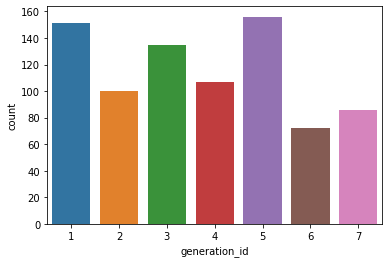

In [3]:
# there is no need for each generation to have its own color
sb.countplot(data = pokemon, x = 'generation_id');

In [4]:
# this is the default color pallete
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [5]:
# if we slice off just the first value,
# our revised chart will use only blue
base_color = sb.color_palette()[0]

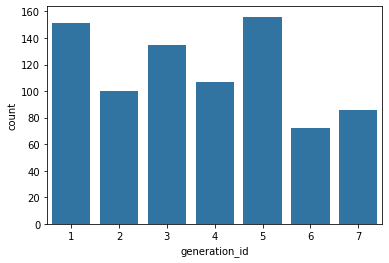

In [6]:
# revised chart without all the colors
# much cleaner!
sb.countplot(data=pokemon, x='generation_id', color=base_color);

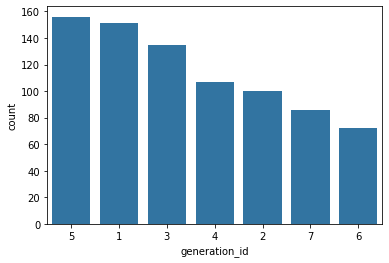

In [7]:
# we can also sort by the number of pokemons
# that were introduced in each generation
# using the order parameter

# first, get the count number programmatically
gen_order = pokemon['generation_id'].value_counts().index

sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);

> Note: Refer to the `CategoricalDtype` to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.

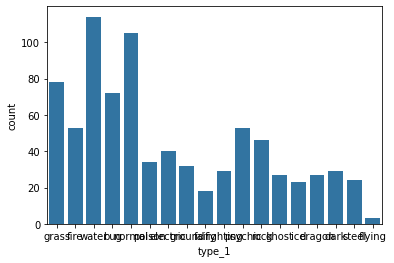

In [8]:
# moving on to pokemon type
# data is mostly unreadable due to overlap
sb.countplot(data=pokemon, x='type_1', color=base_color);

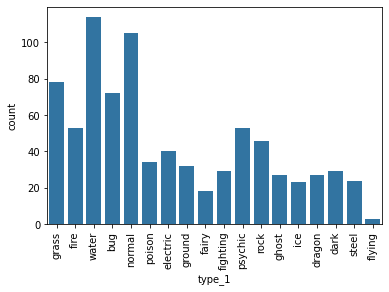

In [9]:
# we can make use of matplotlib's xtics function to rotate
# the category labels
sb.countplot(data=pokemon, x='type_1', color=base_color)
# the labels are turned 90 degrees counterclockwise
plt.xticks(rotation=90);

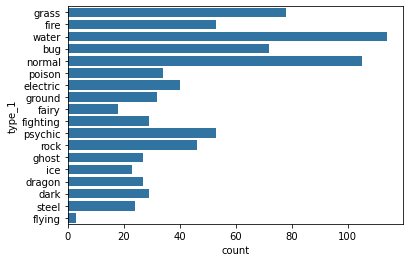

In [10]:
# an alternative approach is to create a horizontal bar chart
# in seabord, this is as simple as changing the x parameter
# into a y
sb.countplot(data=pokemon, y='type_1', color=base_color);

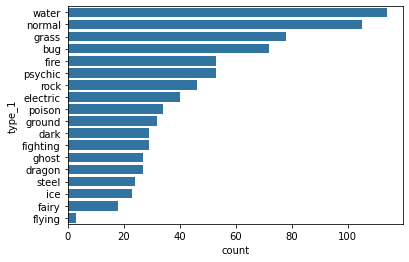

In [11]:
# sorting by type frequency
type_order = pokemon['type_1'].value_counts().index

# water and normal are the most common first types
# taken by pokemon while flying is the least common
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

## Absolute Vs. Relative Frequency
Changing the count axis to reflect relative proportions makes it easier to see how much each category contributes to the whole.

In [12]:
pokemon.head(1)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65


#### Example 1: Demonstrate data wrangling, and plot a horizontal bar chart

In [13]:
pkmn_types = pokemon.melt(id_vars=['id','species'],
                         value_vars=['type_1', 'type_2'],
                         var_name='type_level', value_name='type').dropna()

pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


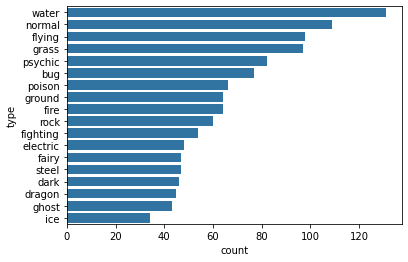

In [14]:
# get the indexes to sort the chart
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

# plot chart and sort by type
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

#### Example 2: Plot a bar chart having the proportions, instead of the actual count, on one of the axes

In [15]:
# what proportion of pokemon have each type?

# we start by finding the length of the 
# longest bar in terms of proportion

# denominator
n_pokemon = pkmn_types['type'].value_counts().sum()

# numerator
max_type_count = type_counts[0]

# length of the longest bar
max_prop = max_type_count / n_pokemon
max_prop

0.10808580858085809

In [16]:
# now, we use numpy's arange function
# to get a set of evenly spaced values
# between zero and max_prop
tick_props = np.arange(0, max_prop, 0.02)

# using list comprehension to create an additional variable
# tick_names to apply to the tick labels 
# these strings will show the proportions with a consistent
# two decimal places
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

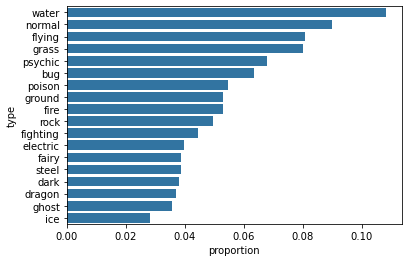

In [17]:
# modify plot to show relative frequency
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order)

# the first argument sets the tick locations:
# since the counts are still in absolute value,
# multiply tick_props by the number of pokemon
# to get their position correct
# the second argument sets the tick labels
plt.xticks(tick_props * n_pokemon, tick_names)

# use xlabel to change the default from 'count'
# to a more appropriate 'proportion'
plt.xlabel('proportion');

#### Example 3: Print the text (proportion) on the bars of a horizontal plot

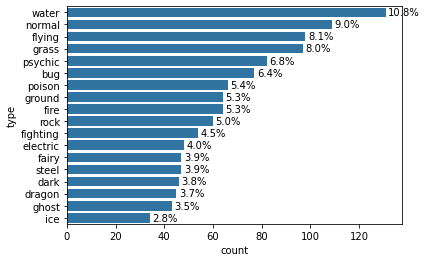

In [18]:
# rather than plotting the data on a relative frequency scale, 
# you might use text annotations to label the 
# frequencies on bars instead

# start with the plot that shows the absolute frequencies
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order)

# logic to print the proportion text on the bars
for i in range(type_counts.shape[0]):
    
    # remember, type_counts contains the frequency of 
    # unique values in the 'type' column
    count = type_counts[i]
    
    # convert count into a percentage, and then 
    # into string
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    # print the string value on the bar
    plt.text(count+1, i, pct_string, va='center')

Read more about the arguments the of `text()` [function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)

#### Example 4: Print the text (proportion) below the bars of a vertical plot

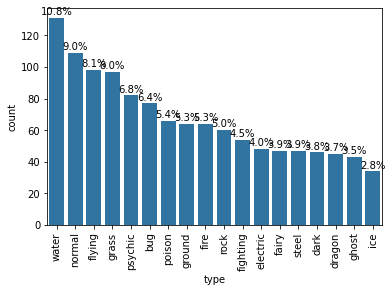

In [19]:
# start with the plot that shows the absolute frequencies
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order);

# recalculating the type_counts just to have clarity
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black');

The `.get_text()` [method](https://matplotlib.org/stable/api/text_api.html#matplotlib.text.Text.get_text) was used to obtain the category name, so we could get the count of each category level. At the end, the `text` [function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html) was used to print each percentage, with the x-position, y-position and string as the three main parameters to the function.

> If the text on the bars are not readable clearly, we can change the size of the plot like this:

In [20]:
# specify the figure size in inches, for both X and Y axes
rcParams['figure.figsize'] = 12,4

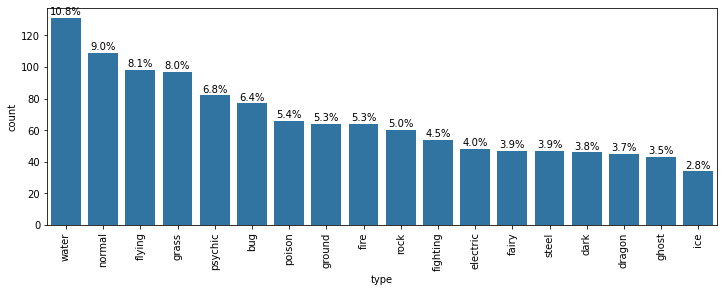

In [21]:
# run the plot code again

# start with the plot that shows the absolute frequencies
sb.countplot(data=pkmn_types, x='type', color=base_color, order=type_order)

# recalculating the type_counts just to have clarity
type_counts = pkmn_types['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90)

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black');

## Counting Missing Data

In [22]:
sales_data = pd.read_csv('support-files/03_Univariate/sales-data.csv')
sales_data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [23]:
# 8190 lines, 12 columns
sales_data.shape

(8190, 12)

In [24]:
# create a table with the number of missing values
# in each column
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [25]:
# what if we want to visualize these missing counts?
# first, let's drop the columns that do not have any NaN/None values
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
na_counts

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Note: for more information on Seaborn's `barplot()` [function](https://seaborn.pydata.org/generated/seaborn.barplot.html)

In [26]:
na_counts.index.values

array(['Store', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday'], dtype=object)

In [27]:
# return to default
rcParams['figure.figsize'] = 6,4

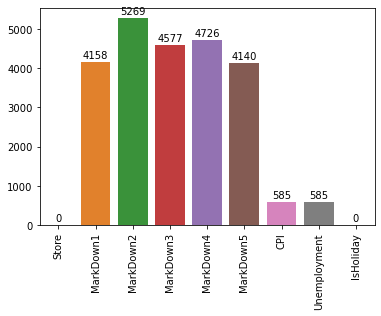

In [28]:
# plot the bar chart from the NaN tabular data
# and also print values on each bar

# the first argument to the function contains the x-values (column names)
# the second contains the y-values (our counts)
sb.barplot(x=na_counts.index.values, y=na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90)

# logic to print value on each bar
for i in range(na_counts.shape[0]):
    count = na_counts[i]
    
    plt.text(i, count+300, count, ha='center', va='top');

> Note: The `seaborn.barplot()` is a useful function to keep in mind if your data is summarized and you still want to build a bar chart. If your data is not yet summarized, however, just use the `countplot` function so that you don't need to do extra summarization work.

## Bar Chart Practice
In this exercise, you'll be working with the dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in this [GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

#### **TO DO Task 1** 
`1.` Explore the `pokemon` dataframe, and try to understand the significance of each of its column.

`2.` There have been quite a few Pokémon introduced over the series' history. Display the count of Pokémon introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

In [29]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [30]:
gen_count = pokemon['generation_id'].value_counts()
gen_count

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

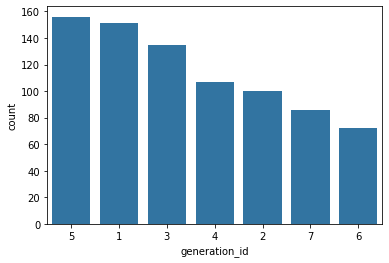

In [31]:
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon, x='generation_id', order=gen_count.index, color=base_color);

#### **TO DO Task 2** 
1. Each Pokémon species has either `type_1`, `type_2` or both `types` that play a part in its offensive and defensive capabilities. The code below creates a new dataframe `pkmn_types` that club the rows of both `type_1` and `type_2`, so that the resulting dataframe has **new** column, `type_level`. 

**Display, how frequent is each type?**

The function below will do the following in the pokemon dataframe *out of place*:
1. Select the 'id', and 'species' columns from pokemon. 
2. Remove the 'type_1', 'type_2' columns from pokemon
3. Add a new column 'type_level' that can have a value either 'type_1' or 'type_2'
4. Add another column 'type' that will contain the actual value contained in the 'type_1', 'type_2' columns. For example, the first row in the pokemon dataframe having `id=1`	and `species=bulbasaur` will now occur twice in the resulting dataframe after the `melt()` operation. The first occurrence will have `type=grass`, whereas, the second occurrence will have `type=poison`.

In [32]:
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                         value_vars=['type_1', 'type_2'],
                         var_name='type_level', value_name='type').dropna()

pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [33]:
# checking to see if it worked
# there should be two entries for each pokemon
# testing with bulbasaur
pkmn_types.query('species == "bulbasaur"')

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
807,1,bulbasaur,type_2,poison


2. Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. 

> **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

In [34]:
# value counts for the type column
type_counts = pkmn_types['type'].value_counts()

# get the index to set the order of the bars
type_order = type_counts.index

# denominator
n_pokemon = pkmn_types.shape[0]

# numerator: the the max frequency
max_type_count = type_counts[0]

# length of the longest bar
max_prop = max_type_count / n_pokemon
max_prop

0.10808580858085809

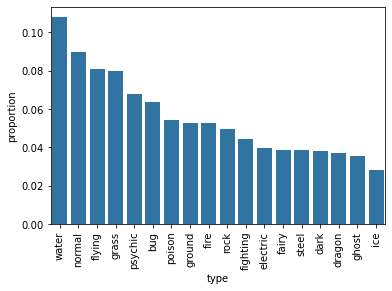

In [35]:
# now, we use numpy's arange function
# to get a set of evenly spaced values
# between zero and max_prop
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# plotting bar chart to show relative frequency

# start with base plot
sb.countplot(data=pkmn_types, x='type', order=type_order, color=base_color)

# the first argument sets the tick locations:
# since the counts are still in absolute value,
# multiply tick_props by the number of pokemon
# to get their position correct
# the second argument sets the tick labels
plt.yticks(tick_props * n_pokemon, tick_names)

# rotate x-ticks
plt.xticks(rotation=90)

# change the x-label from 'count' to something more appropriate,
# like 'proportion'
plt.ylabel('proportion');

In [36]:
pkmn_types['type_level'].value_counts()

type_1    807
type_2    405
Name: type_level, dtype: int64

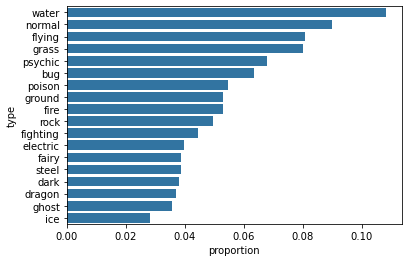

In [37]:
# as a horizontal bar chart: 

# now, we use numpy's arange function
# to get a set of evenly spaced values
# between zero and max_prop
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# plotting to show relative frequency

# start with base plot
sb.countplot(data=pkmn_types, y='type', order=type_order, color=base_color)

# the first argument sets the tick locations:
# since the counts are still in absolute value,
# multiply tick_props by the number of pokemon
# to get their position correct
# the second argument sets the tick labels
plt.xticks(tick_props * n_pokemon, tick_names)

# change the x-label from 'count' to something more appropriate,
# like 'proportion'
plt.xlabel('proportion');

---
## Pie Charts
A **pie chart** is a common univariate plot type that is used to depict relative frequencies for levels of a categorical variable. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken.

#### Guidelines to use a pie chart
- Make sure that your interest is in relative frequencies. Areas should represent parts of a whole.
- Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
- Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent.

If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.

#### Example 1: Plot a simple [Pie Chart](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html)

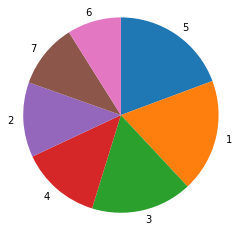

In [38]:
gen_count = pokemon['generation_id'].value_counts()

# use matplotlib.pyplot.pie() to plot the chart
plt.pie(gen_count, labels=gen_count.index, startangle=90, counterclock=False)
plt.axis('square');

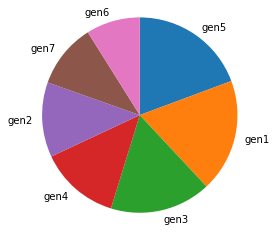

In [39]:
# using a list instead of the indexes to display labels
# on each wedge
# while possible, this is error-prone
plt.pie(gen_count, labels=['gen5', 'gen1', 'gen3', 'gen4', 'gen2', 'gen7', 'gen6'], startangle=90, counterclock=False)
plt.axis('square');

### Donut Plot
A sister plot to the pie chart is the donut plot. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other.

To create a donut plot, you can add a `wedgeprops` argument to the `pie` function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

#### Example 2: Plot a simple Donut Plot

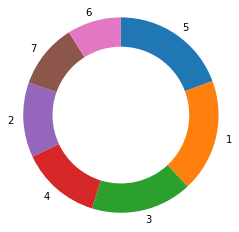

In [40]:
plt.pie(gen_count, labels=gen_count.index, startangle=90, counterclock=False, wedgeprops={'width': 0.3})
plt.axis('square');

Notes: 
- More on [wedge patches](https://matplotlib.org/api/_as_gen/matplotlib.patches.Wedge.html)
- Eager Eyes: [Understanding Pie Charts](https://eagereyes.org/pie-charts)
- Eager Eyes: [An Illustrated Tour of the Pie Chart Study Results](https://eagereyes.org/blog/2016/an-illustrated-tour-of-the-pie-chart-study-results) - how accurately do people perceive different formulations of the pie chart?
- Datawrapper: [What to Consider when Creating a Pie Chart](https://academy.datawrapper.de/article/127-what-to-consider-when-creating-a-pie-chart)

---
## Histograms
A [**histogram**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted to depict the number. You can use either Matplotlib or Seaborn to plot the histograms. There is a mild variation in the specifics, such as plotting gaussian-estimation line along with bars in Seabron's distplot(), and the arguments that you can use in either case.

#### Example 1: Plot a default histogram

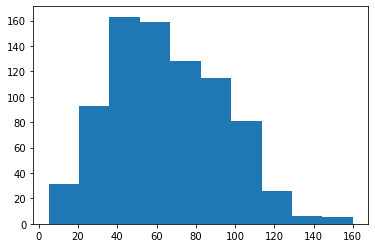

In [41]:
# by default, matplotlib will split the data into 10 bins
plt.hist(data=pokemon, x='speed');

#### Example 2: Histogram with fixed number of bins

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <BarContainer object of 20 artists>)

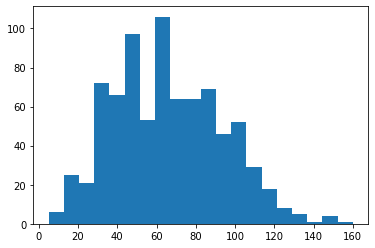

In [42]:
# we have a more detailed look at the data,
# but we still have awkward bin boundaries
# as we can see, the bins are not integers,
# while the data is expressed in ints, which means
# some bins will cover more interger values than others
plt.hist(data=pokemon, x='speed', bins=20)

#### Example 3: Histogram with dynamic number of bins

> Note: You can use descriptive statistics (e.g. via `dataframe['column'].describe()`) to gauge what minimum and maximum bin limits might be appropriate for the plot.

In [43]:
# they seem easily divisible by five
pokemon['speed'].describe()

count    807.000000
mean      65.830235
std       27.736838
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      160.000000
Name: speed, dtype: float64

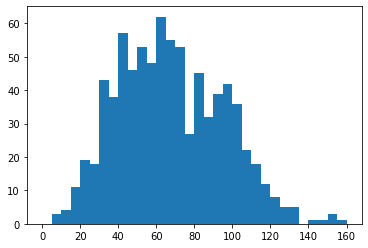

In [44]:
# it's better to make use of the bins parameter
# specifying the bin boundaries explictly

# in the max (stop argument), we included +5 because arange 
# wouldn't include the max, only the values below the max. 
# since 5 is our step, we included a +5 in the stop argument
# this way, all values should be represented in the chart
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data=pokemon, x='speed', bins=bins);

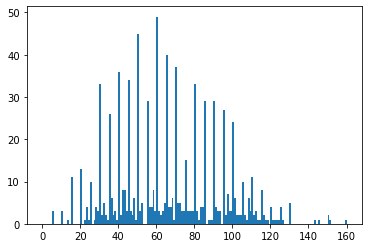

In [45]:
# what happens if we try a super small bin size?
# a lot of noise was introduced in the plot
# on the other hand, it seems that pokemon's speed
# stats are usually divisible by 5
bins = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data=pokemon, x='speed', bins=bins);

#### Example 4: Plot the similar histogram with [`seaborn.displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html).

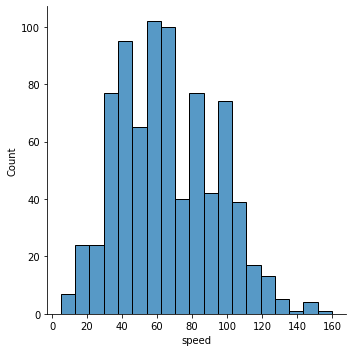

In [46]:
# seaborn also has a histogram function
sb.displot(pokemon['speed']);

> Note: `seaborn.histplot()` [documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot). 

> Notice there is a slight difference between `sb.displot()` and `sb.histplot()`. The former allows for more flexibility in the `kind` argument. It can either be `hist` (default), `kde`, or `ecdf`. The latter has `hist` as its default kind.

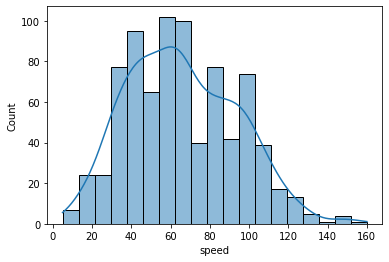

In [92]:
# well, two functions
# using kde=True, the chart becomes similar to the 
# deprecated distplot()
sb.histplot(pokemon['speed'], kde=True);

> Note: On [visualizing distributions](https://seaborn.pydata.org/tutorial/distributions.html) with Seaborn

### Plot two histograms side-by-side
When creating histograms, it's useful to play around with different bin widths to see what represents the data best. Too many bins, and you may see too much noise that interferes with the identification of the underlying signal. Too few bins, and you may not be able to see the true signal in the first place.

Note: `plt.subplots()` [documentation](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html).

#### Example 5: Plot two histograms side-by-side using Matplotlib

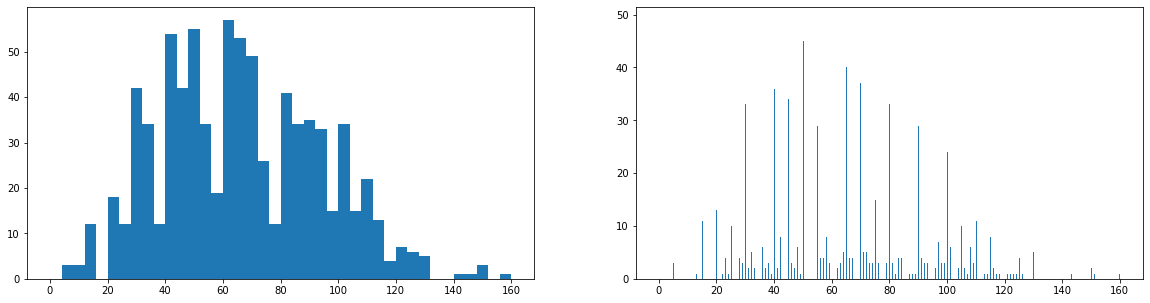

In [48]:
# resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize=[20,5])

# histogram on the left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data=pokemon, x='speed', bins=bins);

# histogram on the right, example of too-small bin size
# 1 row, 2 cols, subplot 2
plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data=pokemon, x='speed', bins=bins);

> Note: using Matplotlib's `subplot()` [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

> Note: The `figure()` [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) is called with the "figsize" parameter so that we can have a larger figure to support having multiple subplots.

#### Example 5.1: Plot two histograms side-by-side using Seaborn

> Note: awesome [post](https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8) on subplotting with matplotlib and seaborn

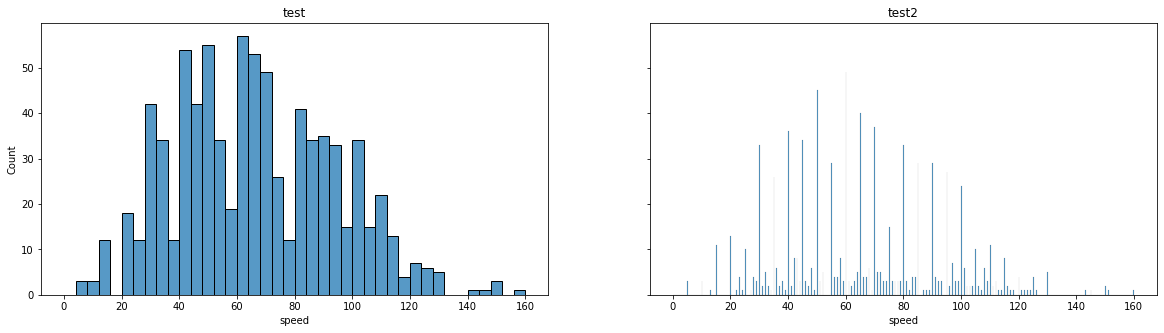

In [49]:
# set sharey to True, to make sure both charts will have the same
# y limits, ticks and scales
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

# displot() won't work in this case, because it doesn't have
# matplotlib's ax argument

# plot 1
# histogram on the left, example of too-large bin size
bins = np.arange(0, pokemon['speed'].max()+4, 4)
sb.histplot(ax=axes[0], x=pokemon['speed'], bins=bins)
axes[0].set_title('test')

# plot 2
# histogram on the right, example of too-small bin size
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
sb.histplot(ax=axes[1], x=pokemon['speed'], bins=bins)
axes[1].set_title('test2');

### Histogram Practice

#### TO DO Task
Pokémon have a number of different statistics that describe their combat capabilities. Here, create a _histogram_ that depicts the distribution of 'special-defense' values taken. 

**Hint**: Try playing around with different bin width sizes to see what best depicts the data.

In [50]:
pokemon.head(1)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65


In [51]:
# as was the case with speed, these values
# seem easily divisible by five
pokemon['special-defense'].describe()

count    807.000000
mean      70.013631
std       27.292344
min       20.000000
25%       50.000000
50%       65.000000
75%       85.000000
max      230.000000
Name: special-defense, dtype: float64

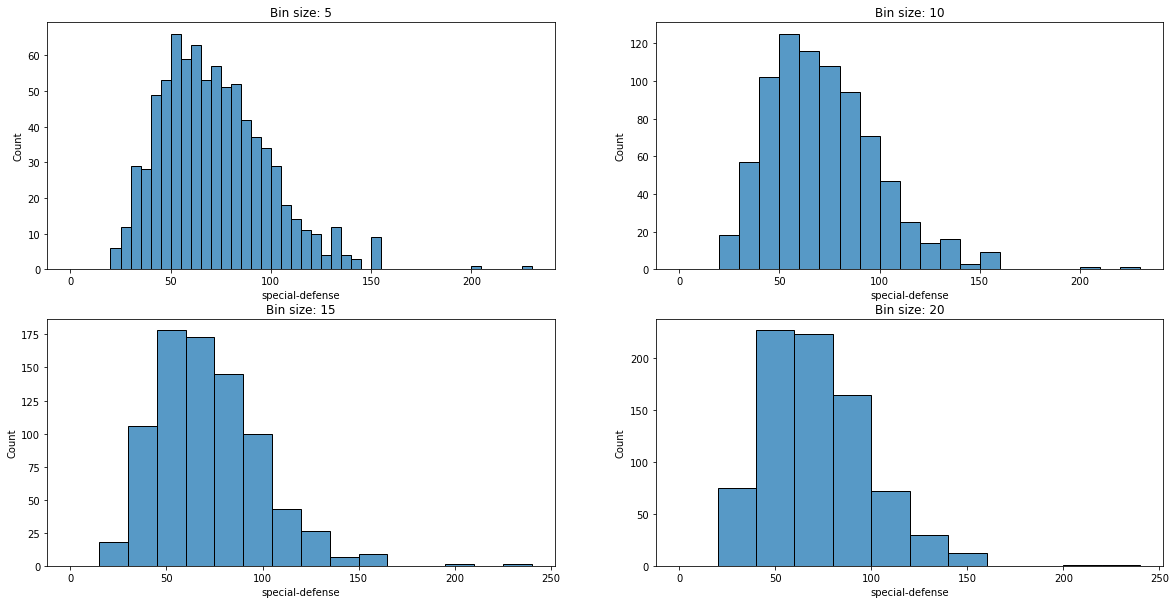

In [52]:
# playing with multiple bin sizes
# 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20,10), sharey=False)

# plot 1
# a bin size of 5 seems to better represent the data
bins = np.arange(0, pokemon['special-defense'].max()+5, 5)
sb.histplot(ax=axes[0, 0], x=pokemon['special-defense'], bins=bins)
axes[0, 0].set_title('Bin size: 5')

# plot 2
bins = np.arange(0, pokemon['special-defense'].max()+10, 10)
sb.histplot(ax=axes[0, 1], x=pokemon['special-defense'], bins=bins)
axes[0, 1].set_title('Bin size: 10')

# plot 3
bins = np.arange(0, pokemon['special-defense'].max()+15, 15)
sb.histplot(ax=axes[1, 0], x=pokemon['special-defense'], bins=bins)
axes[1, 0].set_title('Bin size: 15')

# plot 4
bins = np.arange(0, pokemon['special-defense'].max()+20, 20)
sb.histplot(ax=axes[1, 1], x=pokemon['special-defense'], bins=bins)
axes[1, 1].set_title('Bin size: 20');

---
## Figures, Axes and Subplots
The base of visualization in matplotlib is a [Figure](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html) object. Contained within each Figure will be one or more [Axes](https://matplotlib.org/stable/api/axes_api.html) objects, each Axes object containing a number of other elements that represent each plot. 

A histogram can easily be created like this:

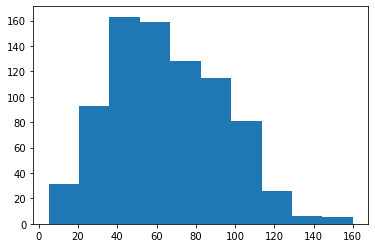

In [53]:
plt.hist(data=pokemon, x='speed');

Python first creates a Figure object. And since the Figure doesn't start with any Axes to draw the histogram onto, an Axes object is created inside the Figure. Finally, the histogram is drawn within that Axes.

If you want more control over the layout and aesthetics of the plots, you can explicitly set up the Figure and Axes:

#### Example 1: Demonstrate `figure.add_axes()` and `axes.hist()`

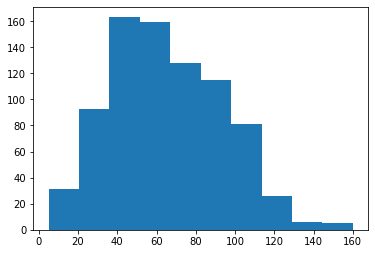

In [54]:
# create a new figure
fig = plt.figure()

# the argument of add_axes represents the dimensions
# [left, bottom, width, height] of the new axes
# all quantities are in fractions of figure width and height
ax = fig.add_axes([.125, .125, .775, .775])
ax.hist(data=pokemon, x='speed');

`figure()` creates a new Figure object, a reference to which has been stored in the variable `fig`. One of the Figure methods is `.add_axes()`, which creates a new Axes object in the Figure. The method requires one list as argument specifying the dimensions of the Axes: the first two elements of the list indicate the position of the lower-left hand corner of the Axes (in this case one quarter of the way from the lower-left corner of the Figure) and the last two elements specifying the Axes width and height, respectively. We refer to the Axes in the variable `ax`. Finally, we use the Axes method `.hist()`.

#### Example 2: Use axes with `seaborn.countplot()`

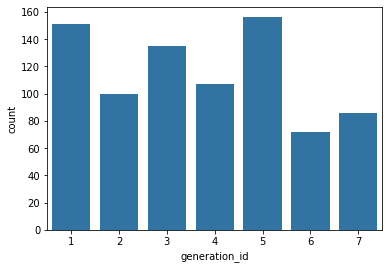

In [55]:
fig = plt.figure()
# [left, bottom, width, height] of the new axes
ax = fig.add_axes([.125, .125, .775, .775])
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon, x='generation_id', color=base_color, ax=ax);

#### Example 3: Sub-plots

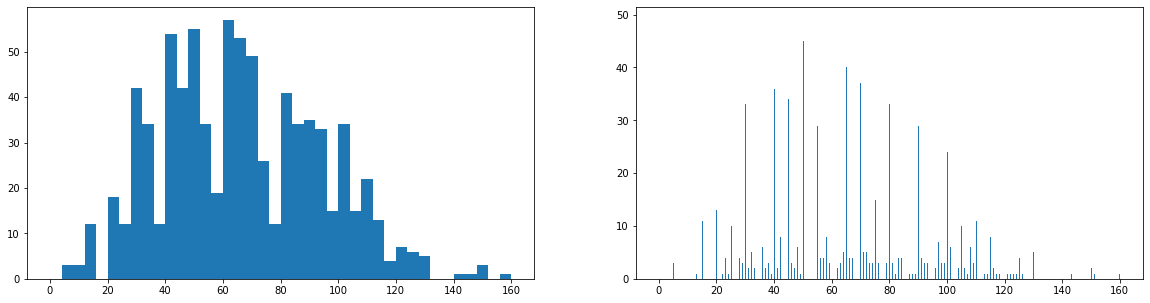

In [56]:
# resize the chart, and have two plots side-by-side
plt.figure(figsize = [20, 5])

# 1 row, 2 columns, subplot 1
plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data=pokemon, x='speed', bins=bins);

# 1 row, 2 columns, subplot 2
plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data=pokemon, x='speed', bins=bins);

First of all, `plt.figure(figsize = [20, 5])` creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 20 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

Then, `plt.subplot(1, 2, 1)` creates a new Axes in our Figure, its size determined by the `subplot()` function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). Again, Python will implicitly set that Axes as the current Axes, so when the `plt.hist()` call comes, the histogram is plotted in the left-side subplot.

Finally, `plt.subplot(1, 2, 2)` creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next `plt.hist()` call comes, the histogram gets drawn in the right-side subplot.

### Additional Techniques

If you don't assign Axes objects as they're created, you can retrieve the current Axes using `ax = plt.gca()`, or you can get a list of all Axes in a Figure `fig` by using `axes = fig.get_axes()`. As for creating subplots, you can use `fig.add_subplot()` in the same way as `plt.subplot()` above. If you already know that you're going to be creating a bunch of subplots, you can use the `plt.subplots()` function.

#### Example 4: Demonstrate `pyplot.sca()` and `pyplot.text()` to generate a grid of subplots

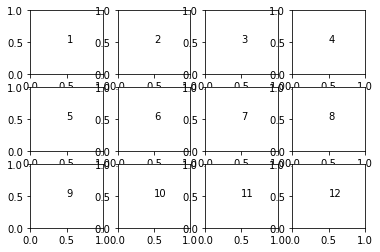

In [61]:
# grid of 3x4 subplots
fig, axes = plt.subplots(3, 4)

# reshape the 3x4 array into a 12-element vector
axes = axes.flatten()

for i in range(12):
    # set the current axes
    plt.sca(axes[i])
    
    # print conventional subplot index number to middle of axes
    # axes limits are [0, 1] on each ax by default
    # increment the iterator counter i by 1 to get the subplot index
    plt.text(0.5, 0.5, i+1)

---
## Choosing a Plot for Discrete Data
If you want to plot a discrete quantitative variable, it is possible to select either a histogram or a bar chart to depict the data.

The histogram is the most immediate choice since the data is numeric, but there's one particular consideration to make regarding the bin edges. Since data points fall on set values (bar-width), it can help to reduce ambiguity by putting bin edges between the actual values taken by the data.

#### An example describing the ambiguity
For example, assume a given bar falls in a range [10-20], and there is an observation with value 20. This observation will lie on the next bar because the given range [10-20] does not include the upper limit 20. Therefore, your readers may not know that values on bin edges end up in the bin to their right, so this can bring potential confusion when they interpret the plot.

#### Example: die rolls 
Compare the two visualizations of 100 random die rolls below (in die_rolls), with bin edges falling on the observation values in the left subplot, and bin edges in between the observation values in the right subplot.

In [66]:
die_rolls = pd.read_csv('support-files/03_Univariate/die-rolls.csv')
die_rolls.head()

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9


#### Example 1: Shifting the edges of the bars can remove ambiguity in the case of Discrete data

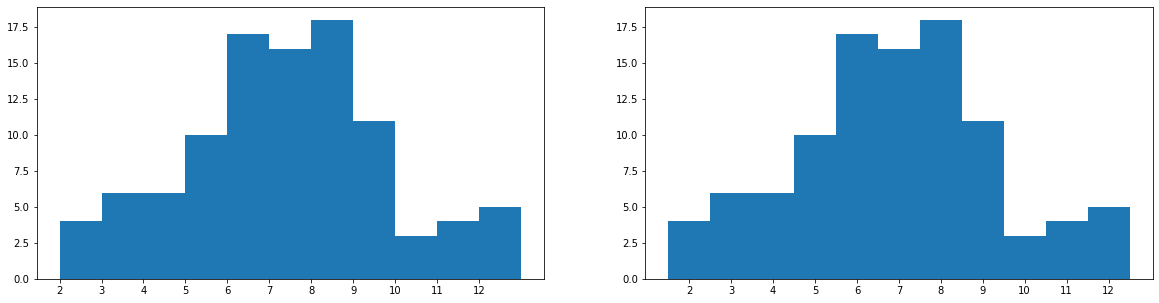

In [72]:
plt.figure(figsize = [20, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
# .1 adds an additional bin to store the die 
# rolls of value 12 alone
# otherwise they'd be lumped in to the last bin,
# creating a problem in perception
bin_edges = np.arange(2, 12+1.1, 1)
plt.hist(data=die_rolls, x='Sum', bins=bin_edges)
plt.xticks(np.arange(2, 12+1, 1));

# histogram on the right, bin edges between intergers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins=bin_edges)
plt.xticks(np.arange(2, 12+1, 1));

#### Example 1.1 : Shifting the edges of the bars can remove ambiguity in the case of Discrete data (Seaborn)

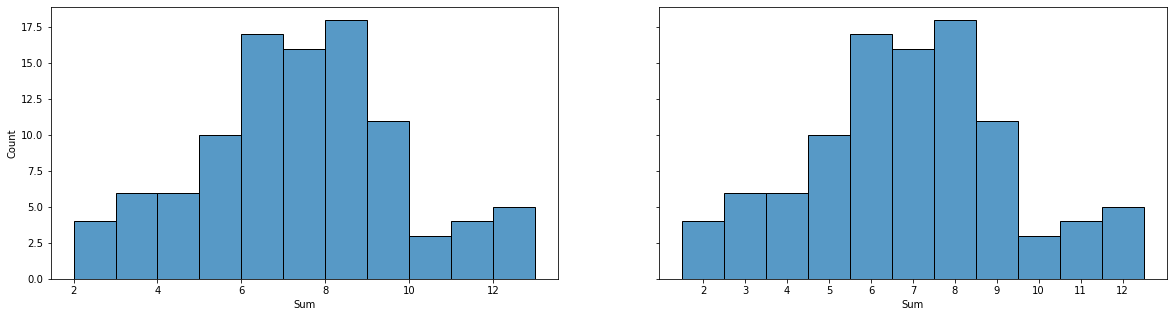

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(20,5), sharey=True)

# histogram on the left, bin edges on intergers
bin_edges = np.arange(2, 12+1.1, 1)
sb.histplot(ax=axes[0], data=die_rolls, x='Sum', bins=bin_edges)
# come back later and try to figure out why xticks isn't working on the first plot
plt.xticks(np.arange(2, 12+1, 1))

# histogram on the right, bin edges between intergers
bin_edges = np.arange(1.5, 12.5+1, 1)
sb.histplot(ax=axes[1], data=die_rolls, x='Sum', bins=bin_edges)
plt.xticks(np.arange(2, 12+1, 1));

#### Example 2: Making gaps between individual bars

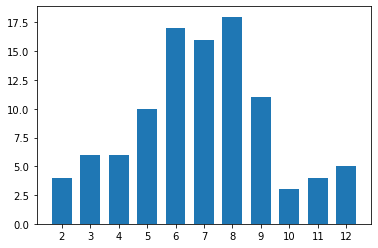

In [115]:
# matplotlib only
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(data=die_rolls, x='Sum', bins=bin_edges, rwidth=0.7)
plt.xticks(np.arange(2, 12+1, 1));

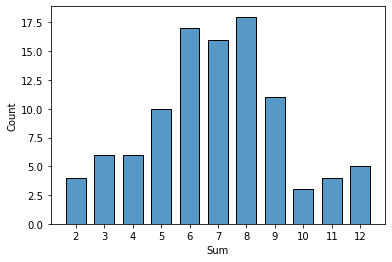

In [117]:
# with seaborn
sb.histplot(data=die_rolls, x='Sum', bins=bin_edges, shrink=0.7)
plt.xticks(np.arange(2, 12+1, 1));

By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

---

## Descriptive Statistics, Outliers and Axis Limits
Visualizations will give you insights into the data that you can't get from descriptive statistics. A plot can show:

- if the data is symmetric or skewed
- interesting areas for further investigation or clarification
- potential errors in the data

In a histogram, you can observe whether or not there are outliers in your data.

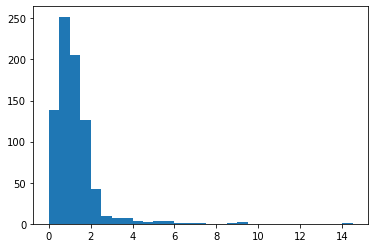

In [118]:
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
# it might be worth it to do a zoom into the bulk of the data
# through the use of axis limits
plt.hist(data=pokemon, x='height', bins=bins);

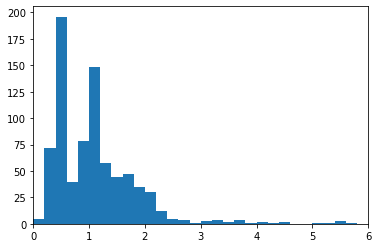

In [122]:
# changing the bin size in anticipation of this reduced axis limit
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins);
# using xlim to set the upper and lower bounds of the bins
plt.xlim((0,6));

> Note: `plt.xlim()` [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html)

In this case, there's not that much additional illumination provided by the trimmed axis limits. Most Pokemon species are human-sized or smaller, with relatively few that are much taller than that. 

As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like the number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data.

#### TO DO: Plot the above two graphs in a single figure of size 20 x 5 inches, side-by-side using Seaborn and Matplotlib.

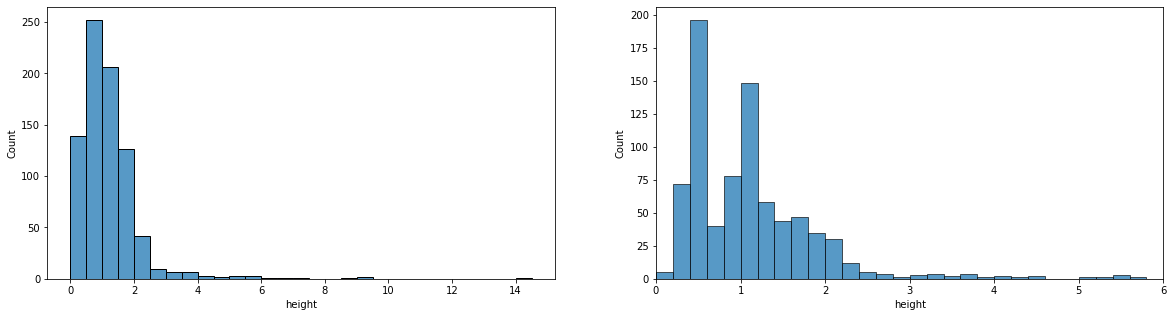

In [130]:
fig, axes = plt.subplots(1, 2, figsize=[20, 5])

bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
sb.histplot(ax=axes[0], data=pokemon, x='height', bins=bins);

bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
sb.histplot(ax=axes[1], data=pokemon, x='height', bins=bins)
plt.xlim((0,6));

#### TO DO: Plot the above two graphs in a single figure of size 20 x 5 inches, side-by-side using only Matplotlib.

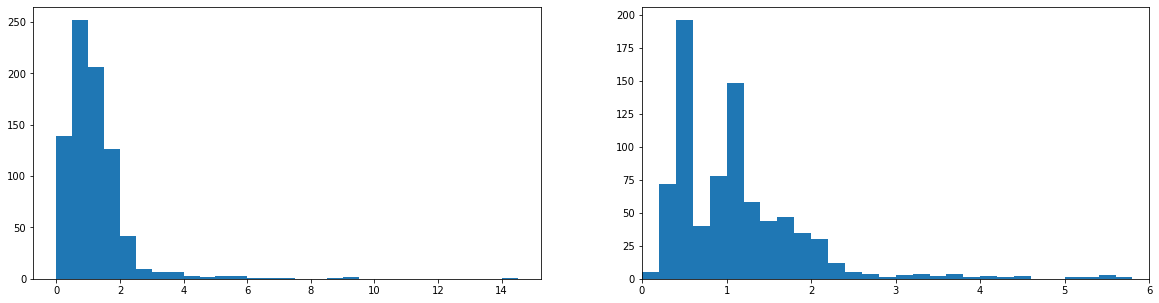

In [134]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x='height', bins=bins);

plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x='height', bins=bins)
plt.xlim((0,6));

---
## Scales and Transformations

In [ ]:
# CONTINUE HERE!